In [ ]:
# IT Skills and Data Analysis-II Assignment

# Project Title: AQI Analysis of USA(2000-2016) and Visualization using Python

# Submitted by B.Sc. (H) Computer Science:
# Sakshi Dhariwal - 13437
# Kirti Rathi - 13474
# Anishka Raghuwanshi - 13486


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress, ttest_ind, ttest_1samp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
# Load the dataset
data = pd.read_csv('data/pollution_us_2000_2016.csv')

In [5]:
# Drop index column if it exists
if 'Unnamed: 0' in data.columns:
    data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# Convert Date column to datetime
data['Date Local'] = pd.to_datetime(data['Date Local'])
data['Year'] = data['Date Local'].dt.year  # Extract year for analysis
data['Month'] = data['Date Local'].dt.month  # Extract month for seasonal analysis

In [7]:
# Filter and clean data
data = data[(data['NO2 Mean'] > 0) & (data['O3 Mean'] > 0)]  # Filter out invalid values
data = data[data['Year'] >= 2010]  # Focus on data from 2010 onwards
data.dropna(subset=['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI'], inplace=True)  # Remove rows with missing AQI values
data = data.dropna()  # Drop rows with missing values

In [8]:
# --- Descriptive Statistics ---
print("\n--- Descriptive Stats ---")
print(data.describe())


--- Descriptive Stats ---
          State Code    County Code       Site Num  \
count  193211.000000  193211.000000  193211.000000   
mean       22.898324      72.610674     957.141591   
min         1.000000       1.000000       1.000000   
25%         6.000000      13.000000      10.000000   
50%        19.000000      37.000000      43.000000   
75%        40.000000     101.000000    1028.000000   
max        80.000000     650.000000    9997.000000   
std        17.144193      88.738742    1863.738154   

                          Date Local       NO2 Mean  NO2 1st Max Value  \
count                         193211  193211.000000      193211.000000   
mean   2013-03-05 23:08:54.584469760      10.550287          21.762184   
min              2010-01-01 00:00:00       0.004167           0.100000   
25%              2011-09-10 00:00:00       4.533333          10.200000   
50%              2013-03-16 00:00:00       8.583333          20.000000   
75%              2014-08-30 00:00:00      

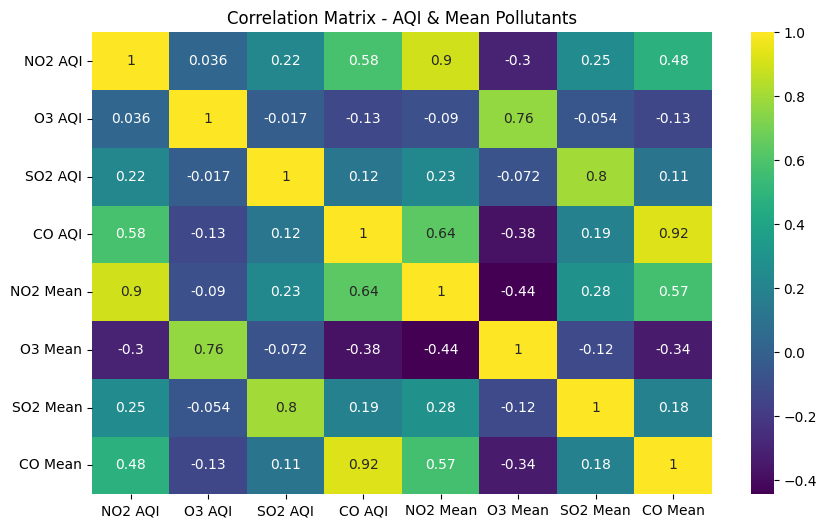

In [9]:
# --- Correlation Analysis ---
aqi_cols = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']
mean_cols = ['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']
correlation_matrix = data[aqi_cols + mean_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix - AQI & Mean Pollutants")
plt.show()

In [10]:
# Calculate and display overall correlation
overall_corr, _ = pearsonr(data['NO2 Mean'], data['O3 Mean'])
print("\nOverall Correlation (NO2 Mean vs O3 Mean):")
print(f"Pearson Correlation Coefficient: {overall_corr}")


Overall Correlation (NO2 Mean vs O3 Mean):
Pearson Correlation Coefficient: -0.4430518867764684


In [11]:
# --- Visualizations ---

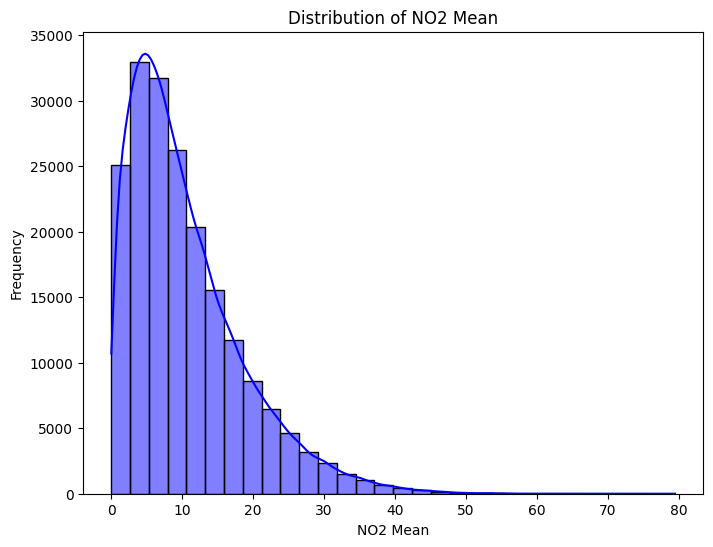

In [12]:
# 1. Distribution of NO2 Mean
plt.figure(figsize=(8, 6))
sns.histplot(data['NO2 Mean'], kde=True, bins=30, color='blue')
plt.title('Distribution of NO2 Mean')
plt.xlabel('NO2 Mean')
plt.ylabel('Frequency')
plt.show()

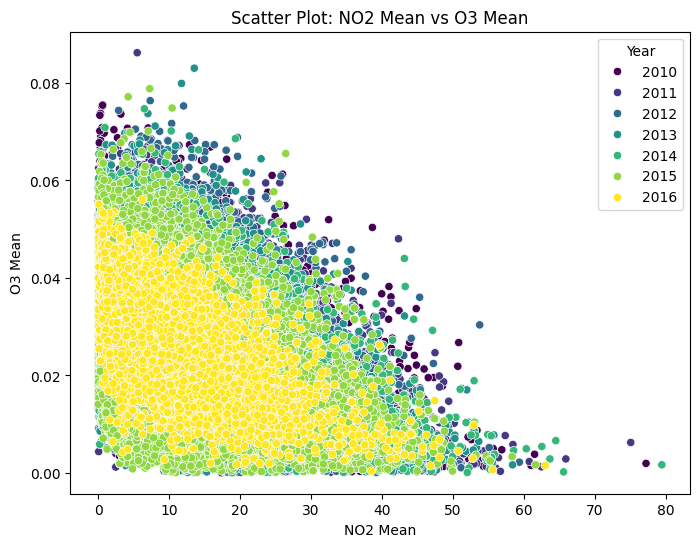

In [13]:
# 2. Scatter Plot: NO2 Mean vs O3 Mean
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NO2 Mean', y='O3 Mean', hue='Year', data=data, palette='viridis')
plt.title('Scatter Plot: NO2 Mean vs O3 Mean')
plt.xlabel('NO2 Mean')
plt.ylabel('O3 Mean')
plt.legend(title='Year')
plt.show()

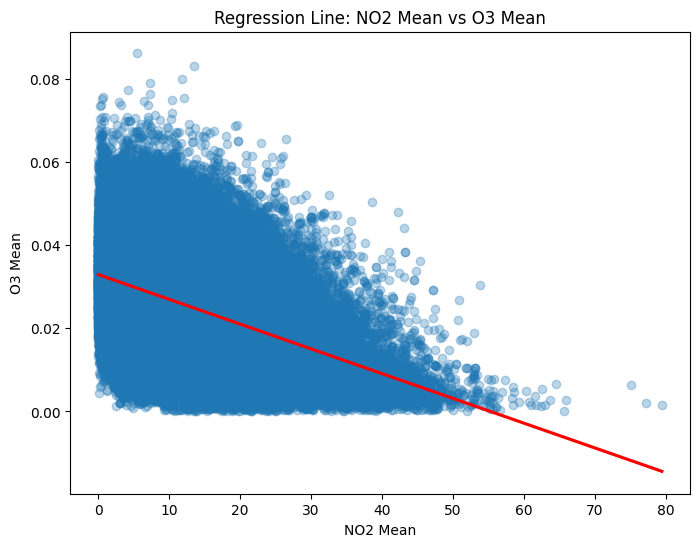

In [14]:
# 3. Regression Line: NO2 Mean vs O3 Mean
plt.figure(figsize=(8, 6))
sns.regplot(x='NO2 Mean', y='O3 Mean', data=data, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Regression Line: NO2 Mean vs O3 Mean')
plt.xlabel('NO2 Mean')
plt.ylabel('O3 Mean')
plt.show()

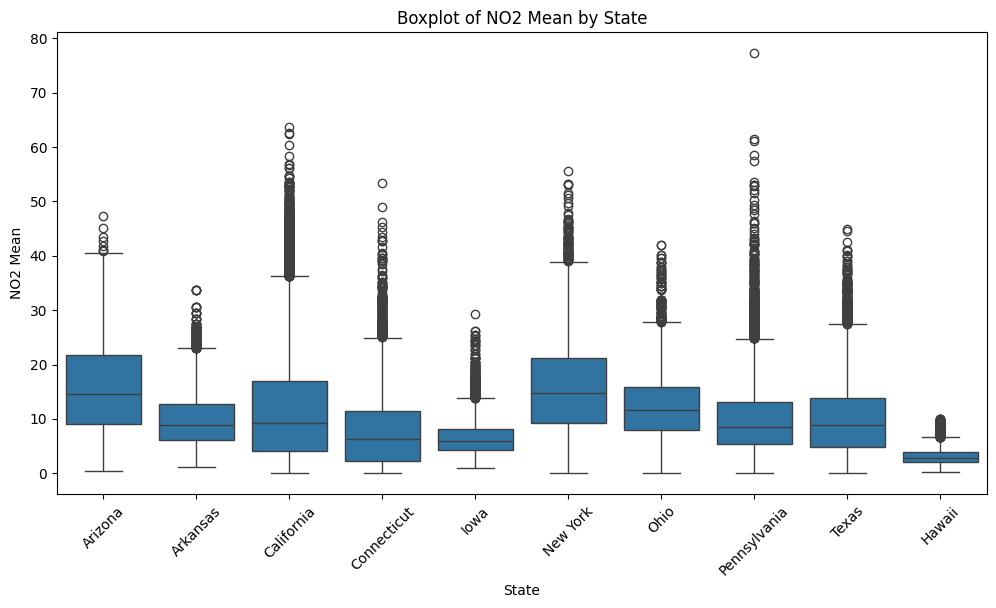

In [15]:
# 4. Boxplot of NO2 Mean by State
plt.figure(figsize=(12, 6))
top_states = data['State'].value_counts().head(10).index  # Top 10 states by data count
sns.boxplot(x='State', y='NO2 Mean', data=data[data['State'].isin(top_states)])
plt.title('Boxplot of NO2 Mean by State')
plt.xlabel('State')
plt.ylabel('NO2 Mean')
plt.xticks(rotation=45)
plt.show()

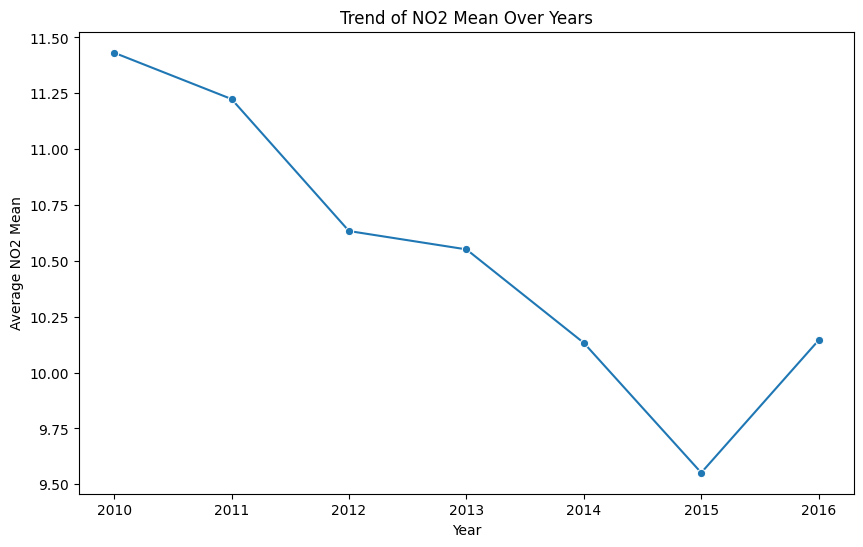

In [16]:
# 5. Trend of NO2 Mean over Years
plt.figure(figsize=(10, 6))
yearly_avg = data.groupby('Year')['NO2 Mean'].mean().reset_index()
sns.lineplot(x='Year', y='NO2 Mean', data=yearly_avg, marker='o')
plt.title('Trend of NO2 Mean Over Years')
plt.xlabel('Year')
plt.ylabel('Average NO2 Mean')
plt.show()

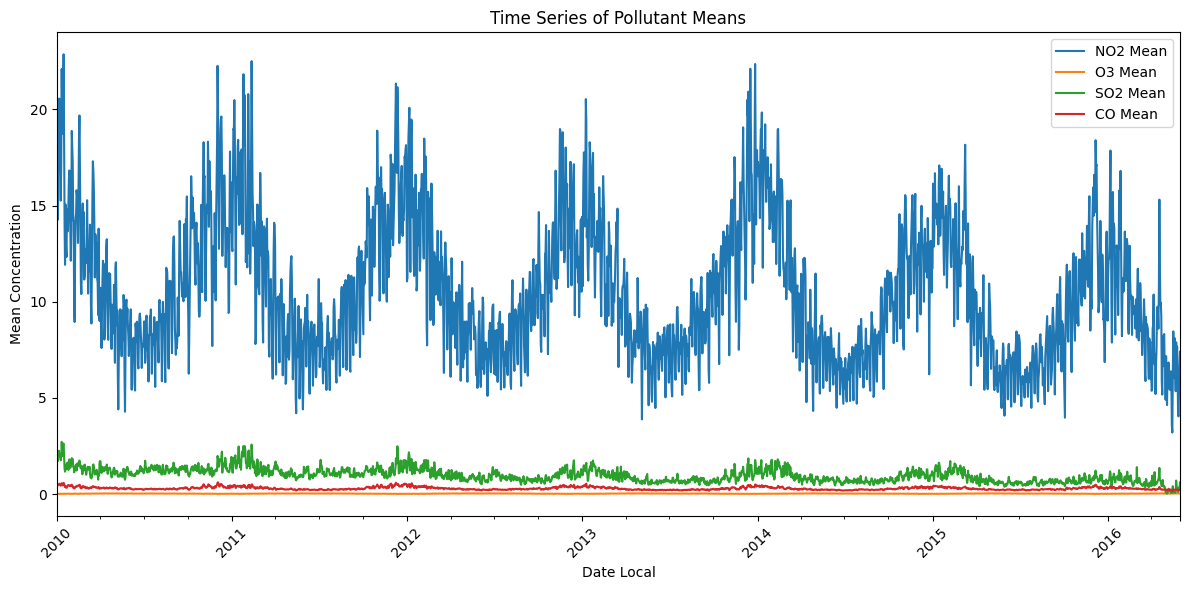

In [17]:
# 6. Time Series Plot for Multiple Pollutants
plt.figure(figsize=(12, 6))
for pollutant in mean_cols:
    data.groupby('Date Local')[pollutant].mean().plot(label=pollutant)
plt.legend()
plt.title("Time Series of Pollutant Means")
plt.ylabel("Mean Concentration")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

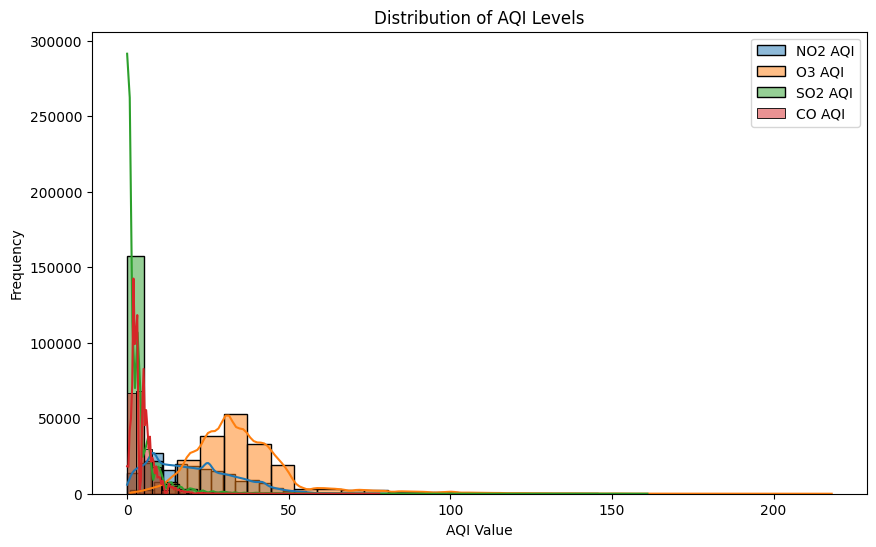

In [18]:
# 7. Distribution of AQI Levels
plt.figure(figsize=(10, 6))
for col in aqi_cols:
    sns.histplot(data[col], kde=True, label=col, bins=30)
plt.legend()
plt.title("Distribution of AQI Levels")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.show()

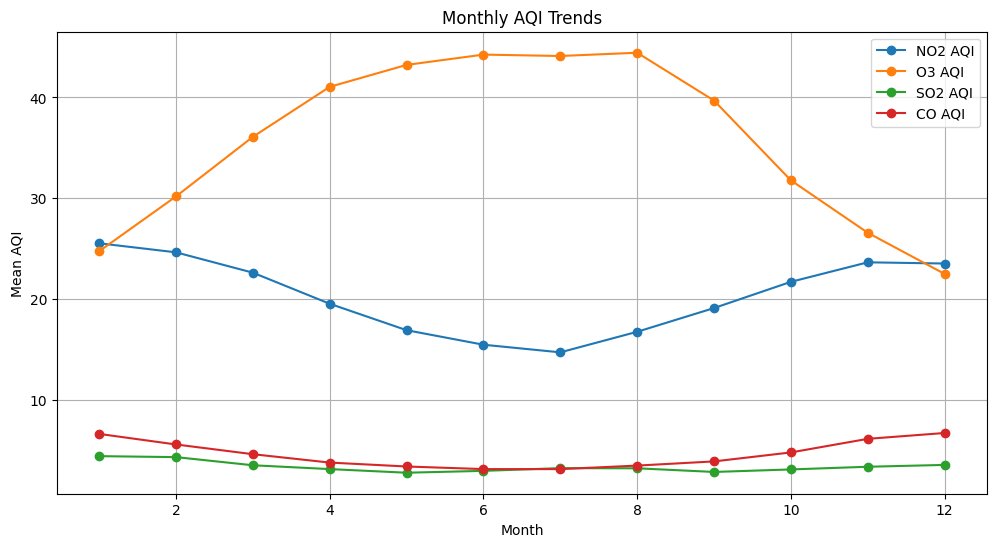

In [19]:
# 8. Monthly AQI Trends
monthly_avg = data.groupby('Month')[aqi_cols].mean()
monthly_avg.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Monthly AQI Trends")
plt.xlabel("Month")
plt.ylabel("Mean AQI")
plt.grid(True)
plt.show()

In [20]:
# --- Regression Analysis ---

In [21]:
# Multivariate Linear Regression
X = data[mean_cols]
y = data['NO2 AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("\n--- Multivariate Linear Regression ---")
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", dict(zip(X.columns, reg.coef_)))


--- Multivariate Linear Regression ---
R2 Score: 0.8168222089021953
MSE: 31.947030112409564
Coefficients: {'NO2 Mean': np.float64(1.5769158256013265), 'O3 Mean': np.float64(137.84176188446295), 'SO2 Mean': np.float64(-0.005432979844528063), 'CO Mean': np.float64(-1.7339653583002743)}


In [22]:
# Simple Regression Analysis: NO2 Mean vs O3 Mean
slope, intercept, r_value, p_value, std_err = linregress(data['NO2 Mean'], data['O3 Mean'])
print("\nSimple Regression Analysis (NO2 Mean vs O3 Mean):")
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}")


Simple Regression Analysis (NO2 Mean vs O3 Mean):
Slope: -0.0005950005719255166, Intercept: 0.03290940645989528, R-squared: 0.19629497437618912, P-value: 0.0


In [23]:
# --- Hypothesis Testing ---

In [24]:
# 1. NO2 Mean in California vs Texas
state1 = data[data['State'] == 'California']['NO2 Mean']
state2 = data[data['State'] == 'Texas']['NO2 Mean']
t_stat, p_val = ttest_ind(state1, state2)
print("\nHypothesis Testing (NO2 Mean in California vs Texas):")
print(f"T-statistic: {t_stat}, P-value: {p_val}")


Hypothesis Testing (NO2 Mean in California vs Texas):
T-statistic: 17.66557532619881, P-value: 1.1133210600188801e-69


In [25]:
# 2. Is NO2 AQI significantly different from 50?
t_stat_aqi, p_val_aqi = ttest_1samp(data['NO2 AQI'].dropna(), 50)
print(f"\nT-test on NO2 AQI > 50: T={t_stat_aqi:.2f}, P={p_val_aqi:.4f}")
if p_val_aqi < 0.05:
    print("Result: Significant difference from 50")
else:
    print("Result: Not significantly different from 50")


T-test on NO2 AQI > 50: T=-987.93, P=0.0000
Result: Significant difference from 50


In [26]:
# Save cleaned data for further analysis
data.to_csv('data/cleaned_pollution_data.csv', index=False)